### Building a CNN using Keras
#### Dataset Fashion MNIST

In [8]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

### Data Preparation

In [9]:
x = pd.read_csv("./Dataset/fashion-mnist.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape) #10 classes

(10000, 784) (10000,)


In [10]:
y.shape

(10000,)

In [11]:
np.unique(y,return_counts=True) #Well Balanced 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [12]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)


(10000, 28, 28, 1) (10000, 10)


In [13]:
import matplotlib.pyplot as plt

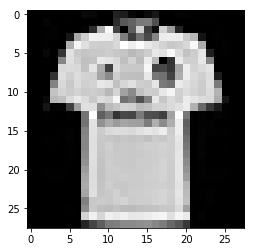

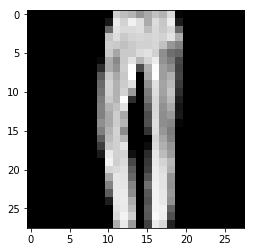

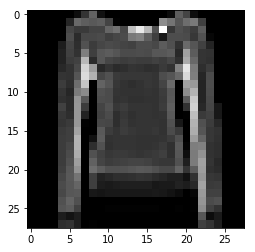

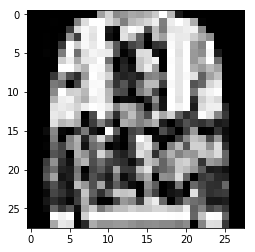

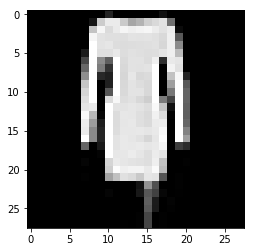

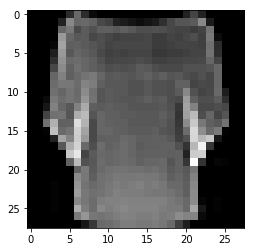

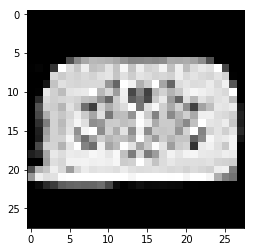

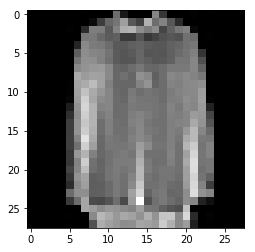

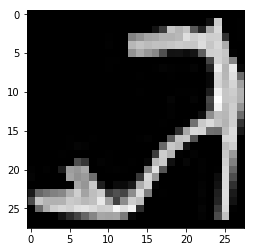

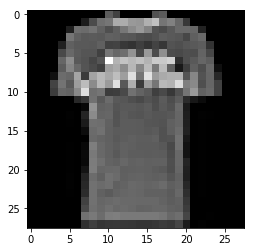

In [14]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

## CNN Model

In [19]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25)) # randomly off 25 % of neurons
model.add(MaxPooling2D(2,2)) 
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu')) 
model.add(Flatten()) # make linear layer
model.add(Dense(10,activation='softmax'))
model.summary()

W0725 23:58:36.282569 19080 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 23:58:36.342738 19080 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 23:58:36.342738 19080 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 23:58:36.406587 19080 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 23:58:36.422574 1908

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [26]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [27]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

W0726 00:20:27.498343 19080 deprecation.py:323] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 17s 2ms/step - loss: 1.4879 - acc: 0.4641 - val_loss: 0.9235 - val_acc: 0.6710
Epoch 2/20
8000/8000 [==============================] - 16s 2ms/step - loss: 0.7672 - acc: 0.7219 - val_loss: 0.7072 - val_acc: 0.7505
Epoch 3/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.6498 - acc: 0.7569 - val_loss: 0.6551 - val_acc: 0.7620
Epoch 4/20
8000/8000 [==============================] - 18s 2ms/step - loss: 0.5890 - acc: 0.7780 - val_loss: 0.5637 - val_acc: 0.7995
Epoch 5/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.5313 - acc: 0.8045 - val_loss: 0.5512 - val_acc: 0.7965
Epoch 6/20
8000/8000 [==============================] - 15s 2ms/step - loss: 0.5097 - acc: 0.8114 - val_loss: 0.5104 - val_acc: 0.8180
Epoch 7/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.4695 - acc: 0.8290 - val_loss: 0.5058 - val_acc: 0.8305
Epoch 8

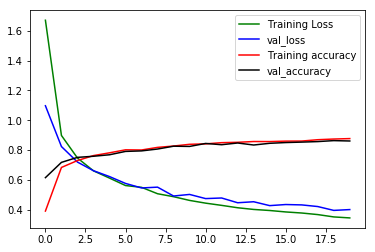

In [12]:
plt.figure(0)
plt.plot(hist.history['loss'],'g',label='Training Loss')
plt.plot(hist.history['val_loss'],'b',label="val_loss")

plt.plot(hist.history['acc'],'r',label="Training accuracy")
plt.plot(hist.history['val_acc'],'black',label="val_accuracy")
plt.legend()
plt.show()
